In [ ]:
#Loading libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Walmart.csv")

In [ ]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [ ]:
#Data cleaning and preprocessing

In [ ]:
df.shape

(10051, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [ ]:
df.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,31
quantity,31
date,0
time,0
payment_method,0
rating,0


In [ ]:
df[df.duplicated()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10000,9950,WALM038,Sugar Land,Fashion accessories,$17,1.0,27/11/23,9:15:00,Cash,3.0,0.48
10001,9951,WALM082,Weslaco,Home and lifestyle,$58,2.0,08/07/20,12:39:00,Cash,6.0,0.33
10002,9952,WALM035,San Angelo,Fashion accessories,$76,3.0,02/10/21,16:34:00,Cash,6.0,0.48
10003,9953,WALM084,Schertz,Home and lifestyle,$68,3.0,13/06/21,10:52:00,Cash,5.0,0.33
10004,9954,WALM046,Temple,Fashion accessories,$40,1.0,22/08/20,14:38:00,Cash,6.0,0.48
10005,9955,WALM054,Sherman,Home and lifestyle,$61,3.0,05/12/21,7:46:00,Cash,3.0,0.21
10006,9956,WALM003,San Antonio,Fashion accessories,$17,3.0,29/10/20,7:13:00,Cash,4.0,0.48
10007,9957,WALM029,Round Rock,Home and lifestyle,$53,1.0,20/06/23,13:41:00,Cash,4.0,0.48
10008,9958,WALM084,Schertz,Fashion accessories,$35,2.0,10/04/22,14:58:00,Cash,7.0,0.33
10009,9959,WALM065,Texas City,Home and lifestyle,$36,1.0,11/03/22,10:26:00,Cash,4.0,0.33


In [ ]:
#some prices have "$" and some dont

df['unit_price']=df['unit_price'].str.replace("$","").astype(float)

In [ ]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [ ]:
#now making the date and time column values to proper format

df["date"]=pd.to_datetime(df["date"],format="%d/%m/%y")
df["time"]=pd.to_datetime(df["time"],format="%H:%M:%S").dt.time

In [ ]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10051 non-null  int64         
 1   Branch          10051 non-null  object        
 2   City            10051 non-null  object        
 3   category        10051 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10051 non-null  datetime64[ns]
 7   time            10051 non-null  object        
 8   payment_method  10051 non-null  object        
 9   rating          10051 non-null  float64       
 10  profit_margin   10051 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 863.9+ KB


In [ ]:
df[df["unit_price"].isnull()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,NaN,NaN,2023-06-09,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,NaN,NaN,2022-08-02,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,NaN,NaN,2023-08-01,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,NaN,NaN,2023-07-21,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,NaN,NaN,2022-05-15,12:36:00,Ewallet,9.0,0.33
1897,1898,WALM098,Mineral Wells,Fashion accessories,NaN,NaN,2023-11-01,10:08:00,Ewallet,4.0,0.18
1898,1899,WALM009,Plano,Home and lifestyle,NaN,NaN,2021-10-01,13:05:00,Ewallet,6.0,0.48
1899,1900,WALM071,Lufkin,Fashion accessories,NaN,NaN,2021-05-19,08:36:00,Ewallet,7.0,0.33
1900,1901,WALM090,Brownwood,Home and lifestyle,NaN,NaN,2021-02-13,14:50:00,Ewallet,8.0,0.33
1901,1902,WALM067,Haltom City,Fashion accessories,NaN,NaN,2022-05-15,19:20:00,Ewallet,8.0,0.33


In [ ]:
print("Missing values percentage =>",(31/10051)*100)

Missing values percentage => 0.3084270221868471


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10020 non-null  int64         
 1   Branch          10020 non-null  object        
 2   City            10020 non-null  object        
 3   category        10020 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10020 non-null  datetime64[ns]
 7   time            10020 non-null  object        
 8   payment_method  10020 non-null  object        
 9   rating          10020 non-null  float64       
 10  profit_margin   10020 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 939.4+ KB


In [ ]:
df.shape

(10020, 11)

In [ ]:
df["total_price"]=df["unit_price"]*df["quantity"]
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17


In [ ]:
df.to_csv("Walmart_cleaned_data.csv",index='False')

In [ ]:
#solving business problem using pandas

In [ ]:
#Q1. Find different payment methods, number of transactions, and quantity sold by payment method

In [ ]:
ans=df.groupby("payment_method").agg(transactions=("invoice_id","count"),total_quantity=("quantity","sum")).reset_index()
ans

,payment_method,transactions,total_quantity
0,Cash,1880,5077.0
1,Credit card,4259,9573.0
2,Ewallet,3881,8932.0


In [ ]:
#Q2. Identify the highest-rated category in each branch. Display the branch, category, and average rating

In [ ]:
ans=df.groupby(["Branch","category"]).agg(average_rating=("rating","mean")).reset_index()
ans=ans.loc[ans.groupby("Branch")["average_rating"].idxmax()]
ans

,Branch,category,average_rating
0,WALM001,Electronic accessories,7.450000
6,WALM002,Food and beverages,8.250000
14,WALM003,Sports and travel,7.500000
17,WALM004,Food and beverages,9.300000
23,WALM005,Health and beauty,8.366667
...,...,...,...
501,WALM096,Sports and travel,9.600000
504,WALM097,Food and beverages,7.675000
510,WALM098,Health and beauty,9.800000
513,WALM099,Electronic accessories,5.950000


In [ ]:
#Q3. a) Identify the busiest day for each branch based on the number of transactions

In [ ]:
df['Day'] = df['date'].dt.day_name()
ans=df.groupby(['Branch','Day']).agg(transactions=('invoice_id','count')).reset_index()
ans=ans.loc[ans.groupby('Branch')['transactions'].idxmax()]
ans

,Branch,Day,transactions
4,WALM001,Thursday,16
11,WALM002,Thursday,15
19,WALM003,Tuesday,33
24,WALM004,Sunday,14
34,WALM005,Wednesday,19
...,...,...,...
670,WALM096,Tuesday,15
672,WALM097,Friday,12
680,WALM098,Monday,18
689,WALM099,Sunday,31


In [ ]:
# b) Identify the busiest month for each branch based on the number of transaction

In [ ]:
df['month']=df['date'].dt.month_name()
ans=df.groupby(['Branch','month']).agg(transactions=('invoice_id','count')).reset_index()
ans=ans.loc[ans.groupby('Branch')['transactions'].idxmax()]
ans

,Branch,month,transactions
2,WALM001,December,18
14,WALM002,December,13
25,WALM003,December,64
36,WALM004,August,10
57,WALM005,October,13
...,...,...,...
1104,WALM096,December,14
1114,WALM097,August,12
1127,WALM098,December,11
1138,WALM099,December,61


In [ ]:
#Q4. Calculate the total quantity of items sold per payment method

In [ ]:
ans=df.groupby('payment_method').agg(total_qty=('quantity','sum')).reset_index().sort_values(by='total_qty',ascending=False)
ans

,payment_method,total_qty
1,Credit card,9573.0
2,Ewallet,8932.0
0,Cash,5077.0


In [ ]:
ans=df.groupby(['City','category']).agg(avg_rating=('rating','mean'),min_rating=('rating','min'),max_rating=('rating','min')).reset_index()
ans

,City,category,avg_rating,min_rating,max_rating
0,Abilene,Electronic accessories,7.966667,7.1,7.1
1,Abilene,Fashion accessories,6.240625,4.0,4.0
2,Abilene,Food and beverages,6.950000,6.0,6.0
3,Abilene,Health and beauty,9.700000,9.7,9.7
4,Abilene,Home and lifestyle,6.096875,4.0,4.0
...,...,...,...,...,...
508,Weslaco,Fashion accessories,5.042012,3.0,3.0
509,Weslaco,Food and beverages,8.733333,7.1,7.1
510,Weslaco,Health and beauty,6.750000,4.3,4.3
511,Weslaco,Home and lifestyle,5.180711,3.0,3.0


In [ ]:
#Q6. Determine the average profit margin (%) with respect to each city

In [ ]:
ans=df.groupby(['City']).agg(avg_profit_margin_percentage=('profit_margin',lambda x: round(x.mean()*100,2))).reset_index().sort_values(by='avg_profit_margin_percentage',ascending=False)
ans

,City,avg_profit_margin_percentage
59,Mansfield,57.00
68,New Braunfels,51.57
32,Flower Mound,48.00
4,Amarillo,48.00
7,Austin,48.00
...,...,...
27,Eagle Pass,21.80
2,Alice,18.00
15,Canyon,18.00
64,Mineral Wells,18.00


In [ ]:
#Q7. Determine the most common payment method for each branch

In [ ]:
ans=df.groupby(['Branch','payment_method']).agg(transactions=('invoice_id','count')).reset_index()
ans=ans.loc[ans.groupby('Branch')['transactions'].idxmax()][['Branch','transactions','payment_method']]
ans.rename(columns={'payment_method':'most_common_payment_method'},inplace=True)
ans

,Branch,transactions,most_common_payment_method
1,WALM001,45,Ewallet
4,WALM002,37,Ewallet
6,WALM003,115,Credit card
10,WALM004,44,Ewallet
13,WALM005,56,Ewallet
...,...,...,...
279,WALM096,50,Ewallet
282,WALM097,38,Ewallet
285,WALM098,44,Ewallet
287,WALM099,83,Credit card


In [ ]:
#PREPARING DATA FOR ML MODEL

In [ ]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price,Day,month
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83,Saturday,January
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40,Friday,March
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,Sunday,March
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,Sunday,January
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17,Friday,February


In [ ]:
df['Branch'].value_counts()

,count
Branch,
WALM058,240
WALM009,236
WALM030,232
WALM069,223
WALM074,212
...,...
WALM033,57
WALM031,56
WALM034,56


In [ ]:
df['City'].value_counts()

,count
City,
Weslaco,399
Waxahachie,381
Port Arthur,240
Plano,236
Richardson,232
...,...
Irving,57
Lewisville,56
College Station,56


<Axes: xlabel='category'>

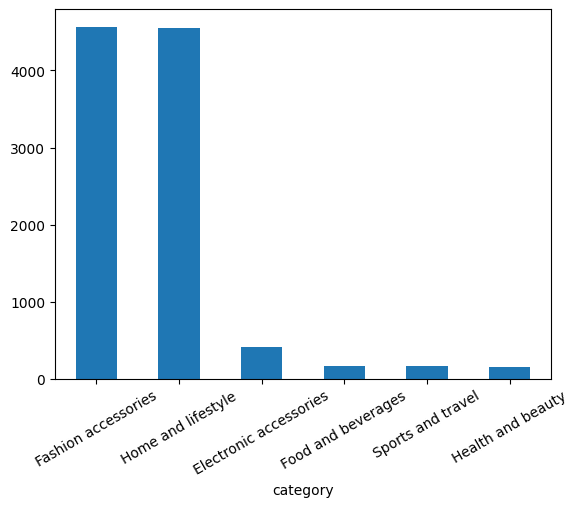

In [ ]:
df['category'].value_counts().plot(kind='bar',rot=30)

<Axes: xlabel='payment_method'>

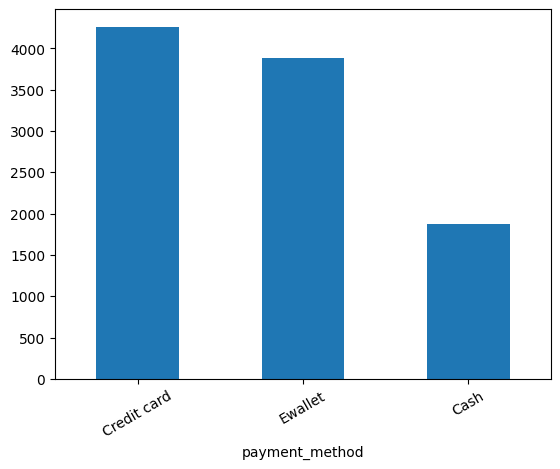

In [ ]:
df['payment_method'].value_counts().plot(kind='bar',rot=30)

In [ ]:
#Data Transformation

In [ ]:
df.drop(columns=['invoice_id','date','time','Day','month'], inplace=True)
df.head()

,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_price
0,WALM003,San Antonio,Health and beauty,74.69,7.0,Ewallet,9.1,0.48,522.83
1,WALM048,Harlingen,Electronic accessories,15.28,5.0,Cash,9.6,0.48,76.40
2,WALM067,Haltom City,Home and lifestyle,46.33,7.0,Credit card,7.4,0.33,324.31
3,WALM064,Bedford,Health and beauty,58.22,8.0,Ewallet,8.4,0.33,465.76
4,WALM013,Irving,Sports and travel,86.31,7.0,Ewallet,5.3,0.48,604.17


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

categorical_columns=['Branch','City','category','payment_method']

for col in categorical_columns:
  df[col]=label_encoder.fit_transform(df[col])

In [ ]:
df.sample(10)

,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_price
6764,45,90,4,55.0,3.0,1,5.0,0.48,165.0
9505,2,83,1,19.0,1.0,0,6.0,0.48,19.0
7046,73,97,4,30.0,3.0,1,6.0,0.33,90.0
5216,30,54,4,36.0,2.0,1,6.0,0.48,72.0
3036,41,13,4,54.0,2.0,2,9.0,0.48,108.0
4022,96,2,4,68.0,1.0,2,7.0,0.18,68.0
5908,40,65,4,79.0,3.0,2,4.0,0.48,237.0
7907,64,91,1,82.0,3.0,1,6.0,0.33,246.0
4926,5,29,4,47.0,3.0,1,6.0,0.48,141.0
5729,96,2,1,15.0,3.0,1,5.0,0.18,45.0


In [ ]:
#Customer Satisfacttion Prediction

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_price
0,2,83,3,74.69,7.0,2,9.1,0.48,522.83
1,47,42,0,15.28,5.0,0,9.6,0.48,76.40
2,66,41,4,46.33,7.0,1,7.4,0.33,324.31
3,63,9,3,58.22,8.0,2,8.4,0.33,465.76
4,12,46,5,86.31,7.0,2,5.3,0.48,604.17


In [ ]:
bins=[3.0,7.0,10.0]
labels=[0,1]

df1['rating']=pd.cut(df1['rating'],bins=bins,labels=labels,include_lowest=True)

df1['rating'].value_counts()

,count
rating,
0,8161
1,1859


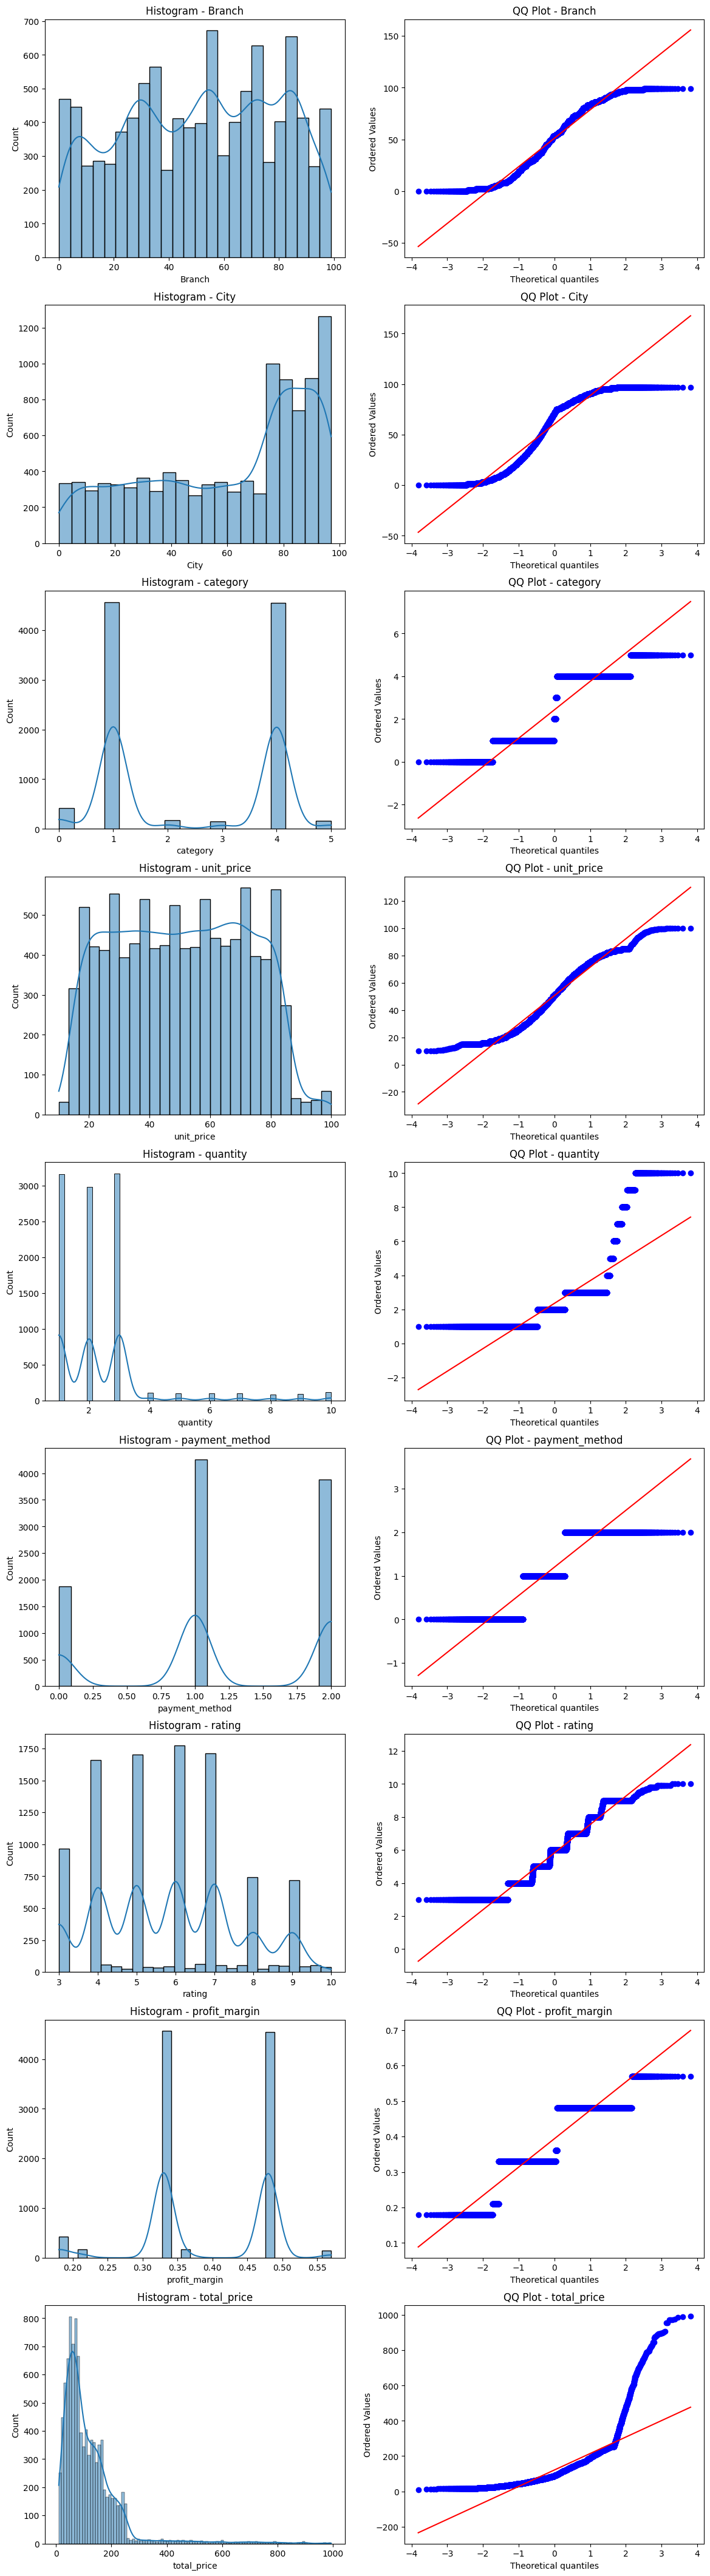

In [ ]:
from scipy.stats import norm, probplot

features=df1.columns

fig,axes=plt.subplots(nrows=len(features),ncols=2,figsize=(14,6*len(features)))

for i,feature in enumerate(features):
  sns.histplot(df[feature],kde=True,ax=axes[i,0])
  axes[i,0].set_title(f'Histogram - {feature}')

  probplot(df[feature],plot=axes[i,1])
  axes[i,1].set_title(f'QQ Plot - {feature}')
plt.show()

In [ ]:
# Installing catboost
!pip install catboost

# importing all libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ELU
from tensorflow.keras.activations import elu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
X=df1.drop(columns=['rating'])
y=df1['rating']

X.head()

,Branch,City,category,unit_price,quantity,payment_method,profit_margin,total_price
0,2,83,3,74.69,7.0,2,0.48,522.83
1,47,42,0,15.28,5.0,0,0.48,76.40
2,66,41,4,46.33,7.0,1,0.33,324.31
3,63,9,3,58.22,8.0,2,0.33,465.76
4,12,46,5,86.31,7.0,2,0.48,604.17


In [ ]:
y

,rating
0,1
1,1
2,1
3,1
4,0
...,...
10046,0
10047,0
10048,0
10049,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(3)

,Branch,City,category,unit_price,quantity,payment_method,profit_margin,total_price
17,60,17,5,72.61,6.0,1,0.33,435.66
1770,36,53,4,38.00,2.0,2,0.48,76.00
1888,39,28,4,21.00,2.0,2,0.48,42.00


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
print(X_train_s.shape)
print(y_train.shape)

print(X_test_s.shape)
print(y_test.shape)

(8016, 8)
(8016,)
(2004, 8)
(2004,)


In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train_s,y_train)

y_pred_xg=xgb.predict(X_test_s)
acc_xg=accuracy_score(y_test,y_pred_xg)

print("Final Accuracy: ", acc_xg)

Final Accuracy:  0.7829341317365269


In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_s,y_train)

y_pred_lg = lgbm.predict(X_test_s)
acc_lg = accuracy_score(y_test, y_pred_lg)
print("Final Accuracy:", acc_lg)

[LightGBM] [Info] Number of positive: 1470, number of negative: 6546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 8016, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183383 -> initscore=-1.493592
[LightGBM] [Info] Start training from score -1.493592


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Final Accuracy: 0.7964071856287425


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_s, y_train)

# Evaluating the final model
y_pred_rf = rf.predict(X_test_s)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Final Accuracy:", acc_rf)

Final Accuracy: 0.7759481037924152


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('RF',rf),('XGB',xgb),('LGBM',lgbm)]

vote_model=VotingClassifier(estimators=estimators)

vote_model.fit(X_train_s,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1470, number of negative: 6546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 8016, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183383 -> initscore=-1.493592
[LightGBM] [Info] Start training from score -1.493592


VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('LGBM', LGBMClassifier())])

In [ ]:
y_pred_v=vote_model.predict(X_test_s)
acc_v=accuracy_score(y_test,y_pred_v)
print("Final Acciracy: ",acc_v)

Final Acciracy:  0.7934131736526946


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=8))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(2,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Now one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print('Fixed y_train shape:', y_train.shape)
print('Fixed y_test shape:', y_test.shape)

Fixed y_train shape: (8016, 2)
Fixed y_test shape: (2004, 2)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(X_train_s, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7718 - loss: 0.4836 - val_accuracy: 0.8080 - val_loss: 0.4008
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 0.3928 - val_accuracy: 0.8086 - val_loss: 0.3913
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8231 - loss: 0.3766 - val_accuracy: 0.8217 - val_loss: 0.3895
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8145 - loss: 0.3726 - val_accuracy: 0.8099 - val_loss: 0.3843
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8153 - loss: 0.3751 - val_accuracy: 0.8074 - val_loss: 0.3845
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.3675 - val_accuracy: 0.8074 - val_loss: 0.3834
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8208 - loss: 0.3658 - val_accuracy: 0.8086 - val_loss: 0.3840
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8182 - loss: 0.3658 - val_accuracy: 0.

In [ ]:
y_test_labels = y_test.argmax(axis=1)

# Making predictions
y_prob = model.predict(X_test_s)
y_pred = y_prob.argmax(axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7749500998003992


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df1=df.copy()
df1.dropna(inplace=True)

In [ ]:
bins = [3.0, 7.0, 10.0]  # Bin edges
labels = [0, 1]  # Bin labels
df1['rating'] = pd.cut(df1['rating'], bins=bins, labels=labels, include_lowest=True)

X = df1.drop(columns=['rating'])  # Features (excluding 'rating')
y = df1['rating']  # Target (rating)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = ['unit_price', 'quantity', 'profit_margin', 'total_price']
categorical_cols = ['Branch', 'City', 'category', 'payment_method']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Final Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 1470, number of negative: 6546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 8016, number of used features: 211
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183383 -> initscore=-1.493592
[LightGBM] [Info] Start training from score -1.493592
Final Accuracy: 0.7959081836327345


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#Testing the model

In [ ]:
new_data = pd.DataFrame({
    'Branch': ['WALM003'],
    'City': ['San Antonio'],
    'category': ['Health and beauty'],
    'unit_price': [74.69],
    'quantity': [3.0],
    'payment_method': ['Ewallet'],
    'profit_margin': [0.48],
    'total_price': [224.07]
})

predictions = pipeline.predict(new_data)

print(predictions)

rating_map = {0: 'Low-Mid Rating (3.0-7.0)', 1: 'High Rating (7.0-10.0)'}
predicted_ratings = [rating_map[pred] for pred in predictions]

print("Predicted Ratings:", predicted_ratings)

[0]
Predicted Ratings: ['Low-Mid Rating (3.0-7.0)']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
new_data = pd.DataFrame({
    'Branch': ['WALM048'],
    'City': ['Harlingen'],
    'category': ['Electronic accessories'],
    'unit_price': [15.28],
    'quantity': [5.0],
    'payment_method': ['Cash'],
    'profit_margin': [0.48],
    'total_price': [76.4]
})

predictions = pipeline.predict(new_data)

print(predictions)

rating_map = {0: 'Low Rating (3.0-7.0)', 1: 'High Rating (7.0-10.0)'}
predicted_ratings = [rating_map[pred] for pred in predictions]

print("Predicted Ratings:", predicted_ratings)

[1]
Predicted Ratings: ['High Rating (7.0-10.0)']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
